Task:Geospatial Analysis
Visualize the locations of restaurants on amap using latitude and longitudeinformation.
Analyze the distribution of restaurants across different cities or countries.
Determine if there is any correlation between the restaurant's location and its rating.

1.Visualizing the locations of restaurants on a map using latitude and longitude information.

In [21]:
import pandas as pd
from folium.plugins import MarkerCluster

df=pd.read_csv('Dataset .csv',encoding='utf-8')
#create a map center 
map_center=[df['Latitude'].mean(),df['Longitude'].mean()]
restaurant_map=folium.Map(location=map_center,zoom_start=2)
marker_cluster = MarkerCluster().add_to(restaurant_map)
#plot each restaurants location on the map

for index,row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'],row['Longitude']],
        popup=(f"Restaurant:{row['Restaurant Name']}<br>Rating:{row['Aggregate rating']}"),
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)
restaurant_map.save("restaurants_map3.html")


2.Analyzing the distribution of restaurants across different cities or countries.

i)Distribution of restaurants by city

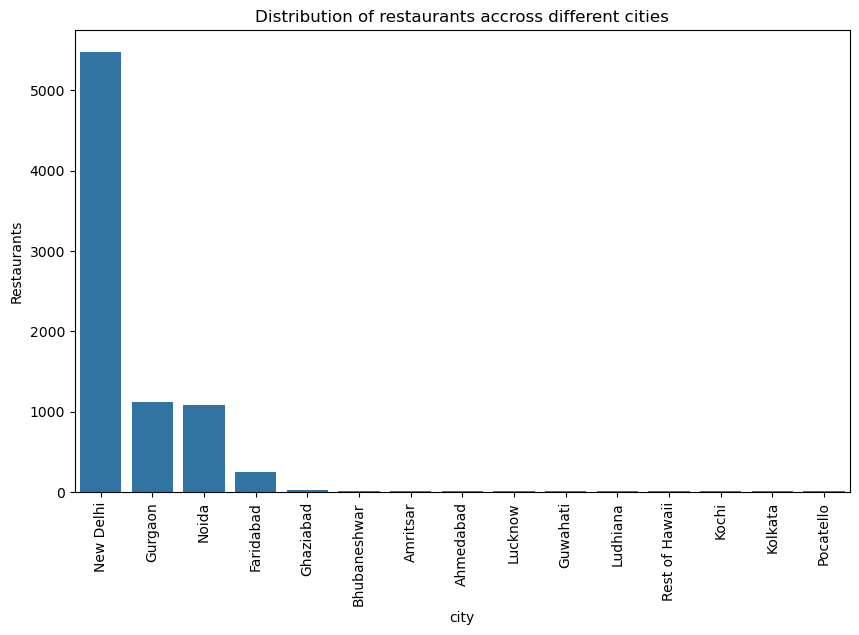

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

city_counts=df['City'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.head(15).index,y=city_counts.head(15).values)#top 15 cities with most restaurants
plt.xlabel('city')
plt.ylabel('Restaurants')
plt.title('Distribution of restaurants accross different cities')
plt.xticks(rotation=90)
plt.show()

ii)Distribution of restaurants by Country

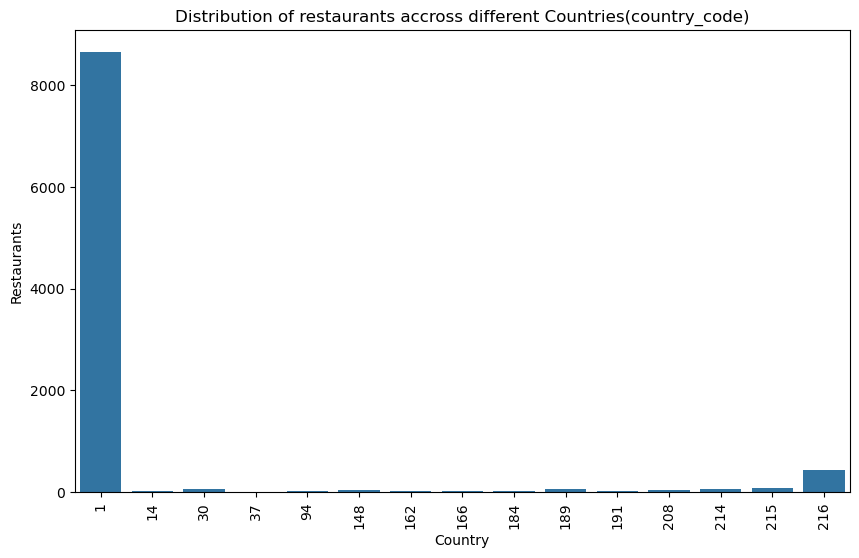

In [27]:
country_dist=df['Country Code'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=country_dist.head(15).index,y=country_dist.head(15).values)#top 15 countries with most restaurants
plt.xlabel('Country')
plt.ylabel('Restaurants')
plt.title('Distribution of restaurants accross different Countries(country_code)')
plt.xticks(rotation=90)
plt.show()


3.Determining if there is any correlation between the restaurant's location and its rating.

i)Scatter Plots for Latitude and Longitude vs Ratings

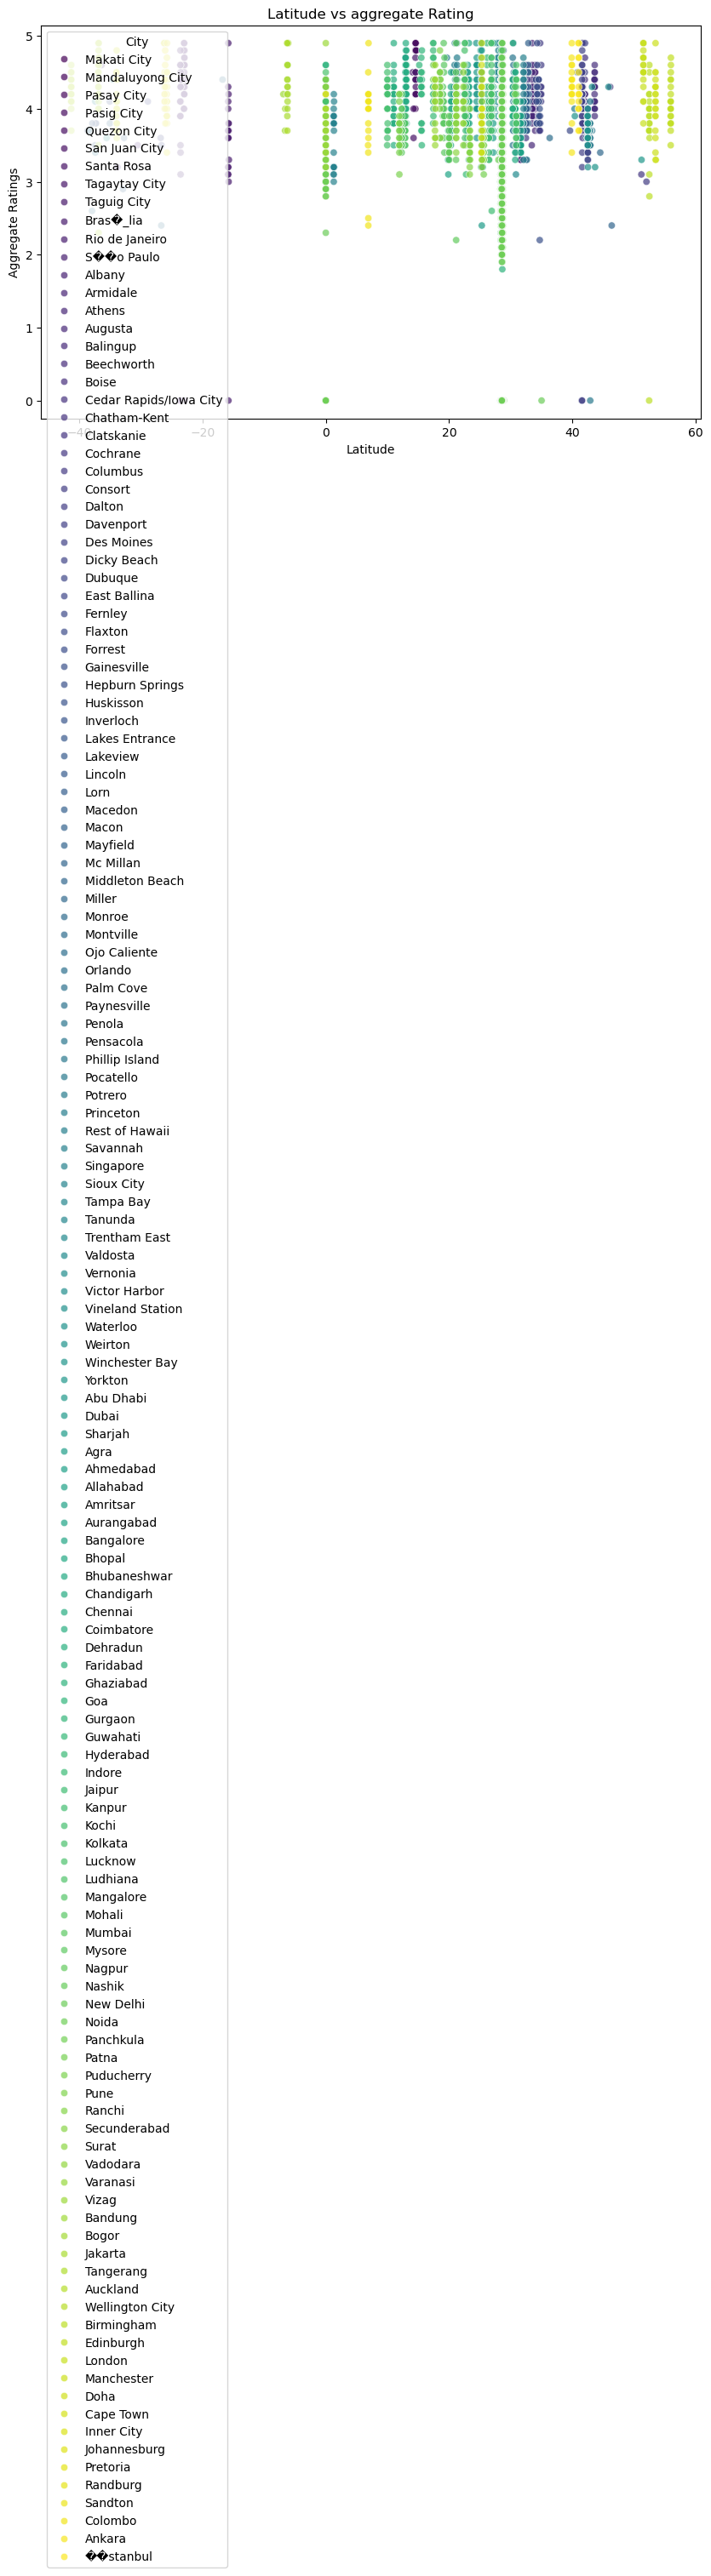

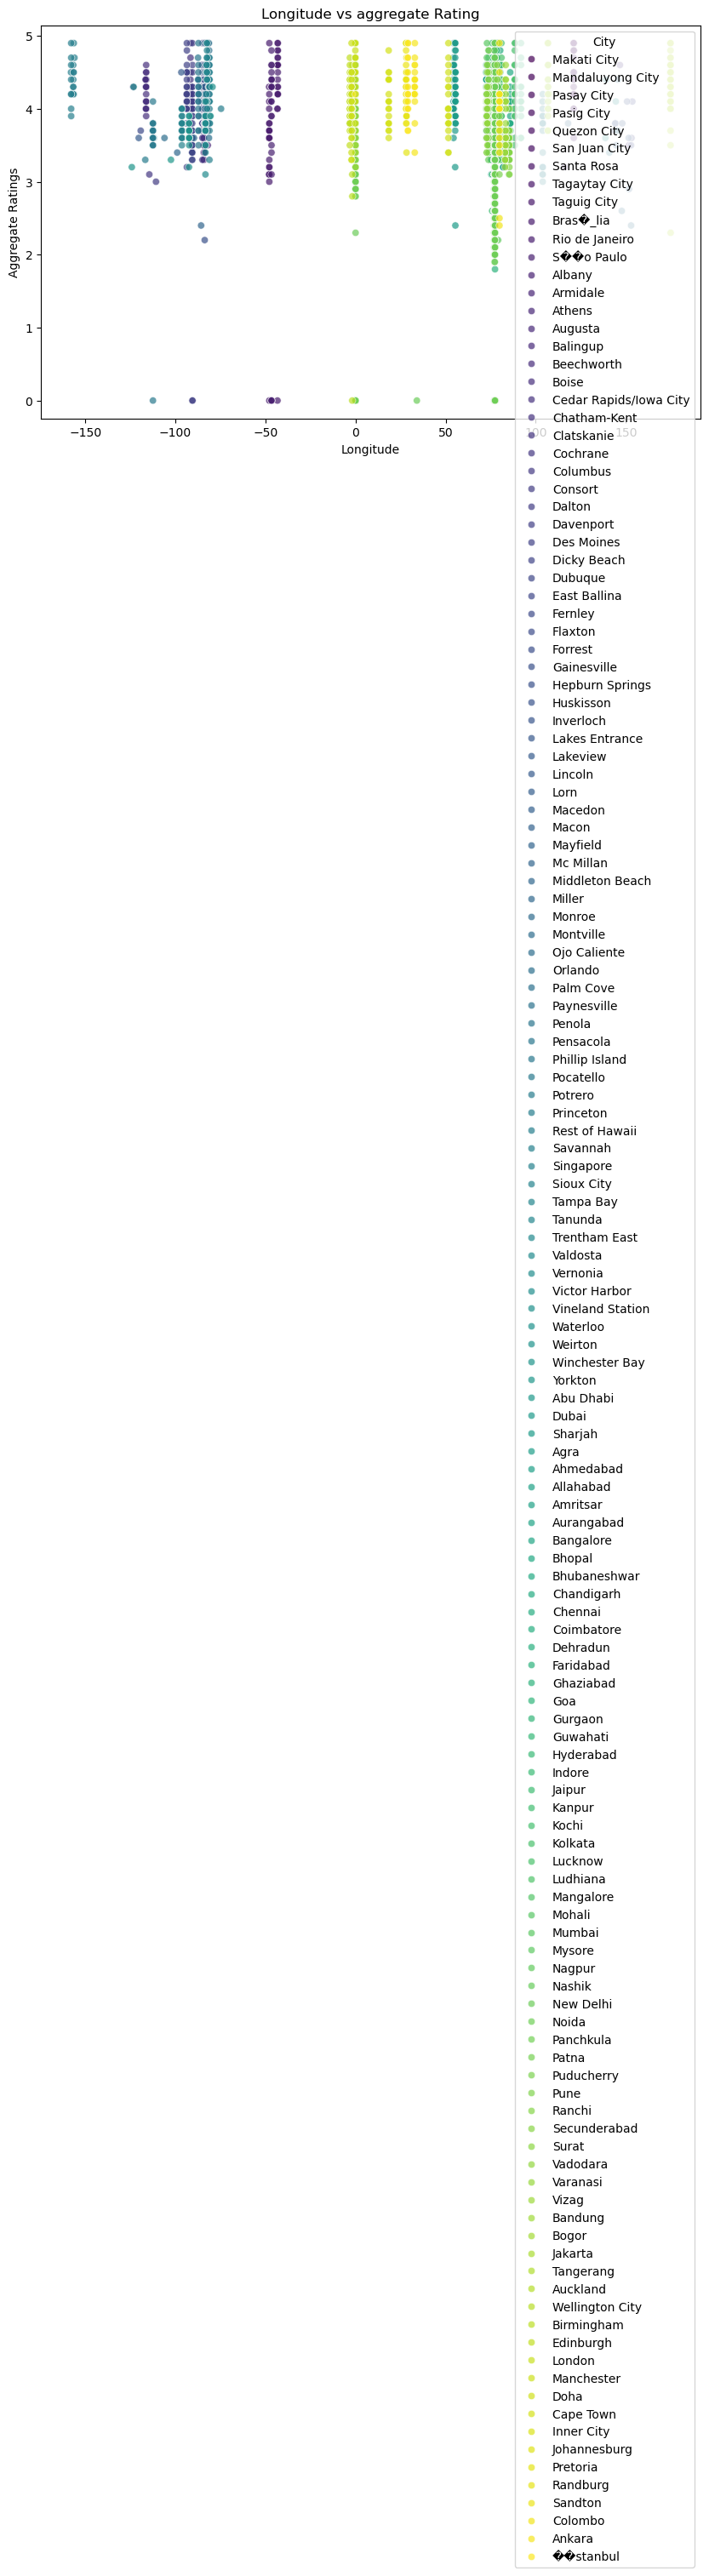

In [53]:
#For latitude vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='Latitude',y='Aggregate rating',data=df,hue='City',palette='viridis',alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Aggregate Ratings')
plt.title('Latitude vs aggregate Rating')
plt.show()

#For longitude vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude',y='Aggregate rating',data=df,hue='City',palette='viridis',alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Aggregate Ratings')
plt.title('Longitude vs aggregate Rating')
plt.show()



ii) Correlation between latitude longitude and Rating

                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


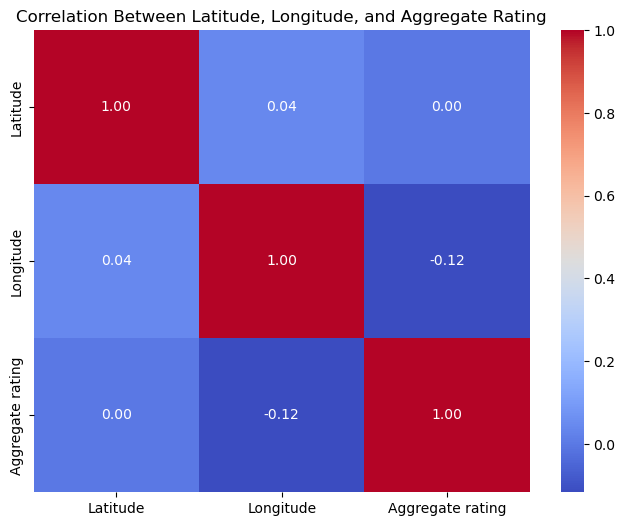

In [51]:

location_rating_df = df[['Latitude', 'Longitude', 'Aggregate rating']]
correlation_matrix = location_rating_df.corr()

print(correlation_matrix)

# Plot the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Latitude, Longitude, and Aggregate Rating')
plt.show()
